<a href="https://colab.research.google.com/github/glimmer-jm/Projects/blob/main/Detecting_Parkinson%E2%80%9Fs_Disease_Using_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Parkinson‟s Disease Using XGBoost

Parkinson’s Disease is a progressive neurological disorder that primarily affects movement. It occurs when nerve cells (neurons) in a part of the brain called the substantia nigra, which produces dopamine, begin to deteriorate or die. Dopamine is a chemical messenger that helps coordinate smooth and controlled muscle movements. When dopamine levels drop, it leads to the characteristic symptoms of Parkinson’s.

### Key Features and Symptoms:
1. **Motor Symptoms:**
   - **Tremors:** Shaking, often starting in the hands or fingers, especially at rest.
   - **Bradykinesia:** Slowness of movement, making simple tasks difficult and time-consuming.
   - **Muscle Rigidity:** Stiffness in the limbs or torso, which can limit range of motion and cause discomfort.
   - **Postural Instability:** Impaired balance and coordination, often appearing in later stages, increasing the risk of falls.

2. **Non-Motor Symptoms:**
   - Sleep disturbances
   - Depression or anxiety
   - Cognitive decline (e.g., memory issues or dementia in advanced cases)
   - Loss of sense of smell
   - Digestive issues, such as constipation

### Causes:
The exact cause isn’t fully understood, but it’s believed to involve a combination of:
- **Genetic Factors:** Certain gene mutations (e.g., LRRK2, SNCA) increase risk, though these account for a small percentage of cases.
- **Environmental Factors:** Exposure to toxins (like pesticides) or head injuries may contribute.
- **Aging:** Risk increases with age, with most cases diagnosed after 60.

### Diagnosis:
There’s no specific test for Parkinson’s. Doctors rely on medical history, symptom evaluation, and neurological exams. Imaging (like MRI or DaTscan) may help rule out other conditions.

### Treatment:
While there’s no cure, treatments aim to manage symptoms:
- **Medications:** Levodopa (converted to dopamine in the brain), dopamine agonists, and MAO-B inhibitors.
- **Therapies:** Physical therapy, occupational therapy, or speech therapy.
- **Surgery:** Deep brain stimulation (DBS) in advanced cases.
- **Lifestyle:** Exercise and diet can improve quality of life.

### Progression:
Parkinson’s progresses differently for everyone. Early stages may involve mild symptoms, while later stages can lead to significant disability, though many people live with it for decades with proper management.

## Objective:
The study aimed to detect PD early using the XGBoost algorithm, emphasizing its potential for improving patient outcomes through timely diagnosis.

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
parkinsons = fetch_ucirepo(id=174)
X = parkinsons.data.features  # Features
y = parkinsons.data.targets   # Status (0 or 1)

In [4]:
import pandas as pd
import numpy as np
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
print("First 5 rows of features (X):")
print(X.head())
print("\nFirst 5 rows of target (y):")
print(y.head())
print("\nNumber of rows and columns in X:", X.shape)
print("Number of rows in y:", y.shape)

First 5 rows of features (X):
   MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter  MDVP:Jitter  MDVP:RAP  MDVP:PPQ  \
0  119.992   157.302    74.997      0.00784      0.00784   0.00370   0.00554   
1  122.400   148.650   113.819      0.00968      0.00968   0.00465   0.00696   
2  116.682   131.111   111.555      0.01050      0.01050   0.00544   0.00781   
3  116.676   137.871   111.366      0.00997      0.00997   0.00502   0.00698   
4  116.014   141.781   110.655      0.01284      0.01284   0.00655   0.00908   

   Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer  ...  MDVP:APQ  Shimmer:DDA  \
0     0.01109       0.04374       0.04374  ...   0.02971      0.06545   
1     0.01394       0.06134       0.06134  ...   0.04368      0.09403   
2     0.01633       0.05233       0.05233  ...   0.03590      0.08270   
3     0.01505       0.05492       0.05492  ...   0.03772      0.08771   
4     0.01966       0.06425       0.06425  ...   0.04465      0.10470   

       NHR     HNR      RPDE       DFA   spread1  

In [6]:
# Explore the data
X.isnull().sum()
X.describe()

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.006220,0.003306,0.003446,0.009920,0.029709,0.029709,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.004848,0.002968,0.002759,0.008903,0.018857,0.018857,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.001680,0.000680,0.000920,0.002040,0.009540,0.009540,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.003460,0.001660,0.001860,0.004985,0.016505,0.016505,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.004940,0.002500,0.002690,0.007490,0.022970,0.022970,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.007365,0.003835,0.003955,0.011505,0.037885,0.037885,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.033160,0.021440,0.019580,0.064330,0.119080,0.119080,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Why Use XGBoost?
Imagine you’re trying to figure out if someone has Parkinson’s based on their voice recordings. You’ve got clues like jitter (shakiness in the voice), pitch, and shimmer, and you need a smart way to connect those clues to an answer: “Yes, they have Parkinson’s” or “No, they don’t.” XGBoost is like a super-smart friend who’s really good at finding patterns in messy data. Here’s why it’s a great choice for this project:

1. **It’s Really Good at Spotting Patterns:**
   - XGBoost looks at all the voice clues (features) and figures out which ones matter most—like noticing that more jitter often means Parkinson’s. It’s better at this than simpler tools because it learns step-by-step, fixing its mistakes as it goes.

2. **It Handles Tricky Data:**
   - Our dataset has 195 recordings with 22 features, and not all features are equally important. Some values vary a lot (like pitch), others barely change (like jitter). XGBoost can handle this mix without getting confused, unlike basic methods that might trip over the differences.

3. **It’s Fast and Strong:**
   - Think of XGBoost as a team of little decision-makers (called trees) working together. Each one makes a small guess, and they combine their guesses to get a solid answer. It’s quick and powerful, which is why it wins a lot of data competitions.

4. **It Works Well with Small Data:**
   - We only have 195 samples—not a ton! Simpler tools might struggle to learn enough from this, but XGBoost is designed to squeeze every bit of info out of small datasets like ours.

5. **It Gives Good Results:**
   - In the paper you shared, XGBoost hit 94.87% accuracy on this exact dataset. That’s like getting almost all the answers right on a test—it’s reliable for spotting Parkinson’s early, which is the whole goal.

### Why Not Something Simpler?
- **Like Logistic Regression:** It’s too basic—it assumes the clues (features) lead to Parkinson’s in a straight-line way, but real life is messier than that.
- **Like a Single Decision Tree:** It’s like asking one friend to guess—it might overthink some clues and miss others. XGBoost uses a team of trees, so it’s smarter and less likely to mess up.

### Simple Analogy
Picture XGBoost as a detective:
- It looks at all the evidence (voice features).
- It builds a case by checking one clue at a time, learning from mistakes (boosting).
- It’s thorough and doesn’t give up until it’s confident (high accuracy).

For Parkinson’s, where early detection can help people a lot, we want that sharp detective—not a rookie who might miss the signs.

In [8]:
# Check the sizes of our splits
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:", y_test.shape)

Size of X_train: (156, 22)
Size of X_test: (39, 22)
Size of y_train: (156, 1)
Size of y_test: (39, 1)


In [9]:
# Train the model
model=XGBClassifier()
model.fit(X_train.values,y_train.values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [10]:
# Make predictions on the test data
y_pred = model.predict(X_test.values)

In [11]:
# Check how good the predictions are
accuracy= accuracy_score(y_test.values, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.87%


In [12]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test.values, y_pred)
# Show the results
print("Accuracy:", accuracy)
print("\nDetailed Report:")
print(report)

Accuracy: 0.9487179487179487

Detailed Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



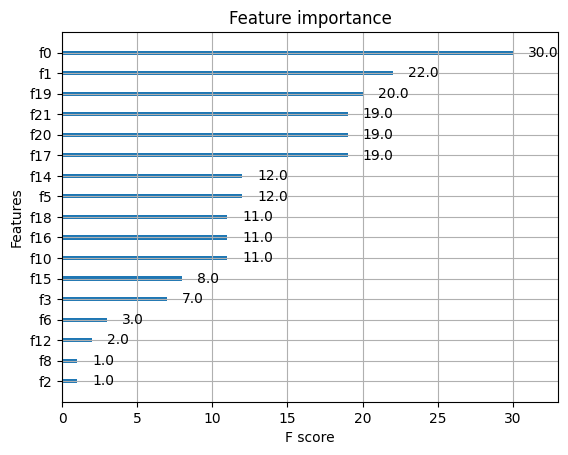

In [13]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(model)
plt.show()